### Tugas Besar IF2220 Probabilitas dan Statistika
Oleh:  
Tri Sulton Adila (13520033)  
Rahmat Rafid Akbar (13520090)  
# Penarikan Kesimpulan dan Pengujian Hipotesis

> Untuk setiap kolom numerik, akan diberikan informasi mengenai  


1) Deskripsi Statistika
- mean
- median
- modus
- standar deviasi
- variansi
- range
- min
- max
- kuartil
- IQR
- skewness
- kurtosis  


2) Visualisasi plot distribusi
- histogram
- boxplot
- penjelasan kondisi berdasarkan plot


3) Normality test
- apakah berdistribusi normal atau tidak

In [188]:
# load
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('water_potability.csv', header=None) # header=None karena data ini tidak memiliki header
atributs = ["id", "pH", "hardness", "solids", "chloramines", "sulfate", "conductivity", "organic_carbon", "trihalomethanes", "turbidity", "potability"]
df.columns = atributs # menambahkan nama kolom
df.set_index('id', inplace=True) # inplace menggantikan data yang lama dengan data baru
df.head()

,pH,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
id,,,,,,,,,,
1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


### pH

Deskripsi Statistik

In [189]:
# deskripsi statistik
desc = df["pH"].describe()
desc.loc["median"] = df["pH"].median()

# estimasi modus dengan menggunakan bantuan histogram
counts, bins = np.histogram(df["pH"], bins="auto")
max_bin = np.argmax(counts)
desc.loc["mode"] = bins[max_bin:max_bin+2].mean()

desc.loc["variansi"] = df["pH"].var()
desc.loc["range"] = df["pH"].max() - df["pH"].min()
desc.loc["IQR"] = desc.loc["75%"] - desc.loc["25%"]
desc.loc["skewness"] = df["pH"].skew()
desc.loc["kurtosis"] = df["pH"].kurtosis()

desc

count       2010.000000
mean           7.087193
std            1.572803
min            0.227499
25%            6.090785
50%            7.029490
75%            8.053006
max           14.000000
median         7.029490
mode           6.807694
variansi       2.473709
range         13.772501
IQR            1.962221
skewness       0.048535
kurtosis       0.626904
Name: pH, dtype: float64

Visualisasi

<AxesSubplot:xlabel='pH', ylabel='Count'>

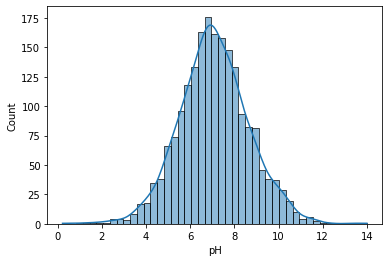

In [190]:
# histogram
sns.histplot(df["pH"], kde=True) # kde=True menampilkan grafik kumulatif (garis tipis)

<AxesSubplot:>

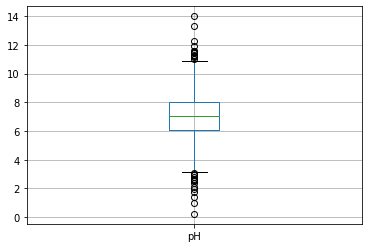

In [191]:
# boxplot
df.boxplot(column="pH")

- Histogram  
Grafik terlihat seperti berdistribusi normal dengan nilai modus, median, dan mean yang sama sekitar tujuh. Grafik terlihat juga seperti tertarik ke atas, ini ditunujukkan dengan nilai kurtosis yang lebih besar dari 0.

- Boxplot  
Distribusi terlihat simetris, nilai rata rata = 7 diikuti dengan nilai kuartil 1 yang sama dengan 6 dan kuartil 3 sama dengan 8. Ini didukung dengan nilai skewed yang mendekati nol. Outlier cenderung lebih menyebar di luar sisi minimum.

Normality test

In [192]:
# statistical tests

stat, p = stats.normaltest(df["pH"])
if p < 0.05: # p < 0.05 menunjukkan bahwa data tidak normal
    print("pH is not normal")
else:
    print("pH is normal")

pH is not normal


Graphical methods  
Dengan melihat pada histogram pH, sekilas dapat kita ketahui grafik membentuk distribusi normal. Data pH memenuhi rata rata = modus = mean, yaitu sekitar 7. Kurva juga terlihat berbentuk simetri terhadap sumbu tegak pada x = $\mu$ dan secara asimtotik, kurva mendekati sumbu datar ke arah kiri dan kanan yang juga berawal dari $\mu$.

### hardness

Deskripsi Statistik

In [193]:
# deskripsi statistik
desc = df["hardness"].describe()
desc.loc["median"] = df["hardness"].median()

# estimasi modus dengan menggunakan bantuan histogram
counts, bins = np.histogram(df["hardness"], bins="auto")
max_bin = np.argmax(counts)
desc.loc["mode"] = bins[max_bin:max_bin+2].mean()

desc.loc["variansi"] = df["hardness"].var()
desc.loc["range"] = df["hardness"].max() - df["hardness"].min()
desc.loc["IQR"] = desc.loc["75%"] - desc.loc["25%"]
desc.loc["skewness"] = df["hardness"].skew()
desc.loc["kurtosis"] = df["hardness"].kurtosis()

desc


count       2010.000000
mean         195.969209
std           32.643166
min           73.492234
25%          176.740657
50%          197.203525
75%          216.447589
max          317.338124
median       197.203525
mode         201.667638
variansi    1065.576277
range        243.845890
IQR           39.706932
skewness      -0.085321
kurtosis       0.525480
Name: hardness, dtype: float64

Visualisasi

<AxesSubplot:xlabel='hardness', ylabel='Count'>

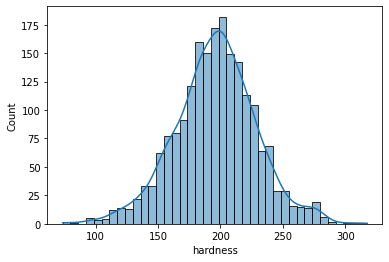

In [194]:
# histogram
sns.histplot(df["hardness"], kde=True) # kde=True menampilkan grafik kumulatif (garis tipis)

<AxesSubplot:>

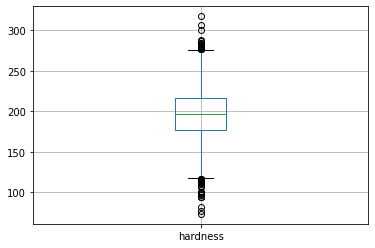

In [195]:
# boxplot
df.boxplot(column="hardness")

- Histogram  
Terlihat pada grafik nilai modus, median memiliki nilai yang haampir sama yaitu sekitar 200. Jika dihitung, nilai rata rata juga mendekati 200. Grafik terlihat simetris, namun pada daerah sekitar 250 - 300, terjadi pelandaian yang membuat grafik tidak terlihat simetris lagi. Dapat dikatakan, grafik masih terlihat berdistribusi normal

- Boxplot  
Jarak antara Q1 dan Q3 masih terlihat simetris dan nilai rata rata terlihat sama dengan median. Jumlah outlier banyak menumpuk di atas maksimal dan lebih menyebar pada bagian bawah minimum. Dapat dikatakan, grafik masih terlihat berdistribusi normal

Normality test

In [196]:
# statistical tests

stat, p = stats.normaltest(df["hardness"])
if p < 0.05: # p < 0.05 menunjukkan bahwa data tidak normal
    print("hardness is not normal")
else:
    print("hardness is normal")

hardness is not normal


Graphical methods  
Jika dikaitkan dengan grafik, penyebab yang membuat kolom hardness ternyata tidak nomal adalah adanya ketidaksimetrisan pada data di antara 250 - 300

### solids

Deskripsi Statistik

In [197]:
# deskripsi statistik
desc = df["solids"].describe()
desc.loc["median"] = df["solids"].median()

# estimasi modus dengan menggunakan bantuan histogram
counts, bins = np.histogram(df["solids"], bins="auto")
max_bin = np.argmax(counts)
desc.loc["mode"] = bins[max_bin:max_bin+2].mean()

desc.loc["variansi"] = df["solids"].var()
desc.loc["range"] = df["solids"].max() - df["solids"].min()
desc.loc["IQR"] = desc.loc["75%"] - desc.loc["25%"]
desc.loc["skewness"] = df["solids"].skew()
desc.loc["kurtosis"] = df["solids"].kurtosis()

desc


count       2.010000e+03
mean        2.190467e+04
std         8.625398e+03
min         3.209426e+02
25%         1.561441e+04
50%         2.092688e+04
75%         2.717053e+04
max         5.648867e+04
median      2.092688e+04
mode        1.934550e+04
variansi    7.439749e+07
range       5.616773e+04
IQR         1.155612e+04
skewness    5.910114e-01
kurtosis    3.373203e-01
Name: solids, dtype: float64

Visualisasi

<AxesSubplot:xlabel='solids', ylabel='Count'>

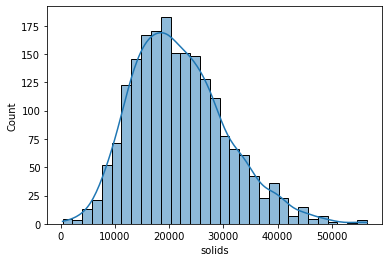

In [198]:
# histogram
sns.histplot(df["solids"], kde=True) # kde=True menampilkan grafik kumulatif (garis tipis)

<AxesSubplot:>

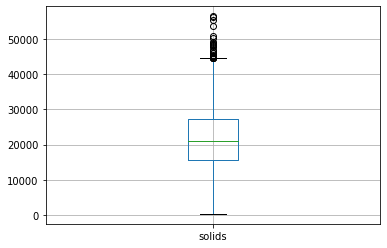

In [199]:
# boxplot
df.boxplot(column="solids")

- Histogram  
Terlihat pada grafik, nilai modus cenderung berada di sebelah kiri dari median. grafik tidak terlihat simetris. Dapat dikatakan, grafik tidak berdistribusi normal. Ini didukung dengan nilai skewness yang lebih dari 0.5 menandakan grafik adalah positive skew.

- Boxplot  
Nilai median tidak terletak di tengah data. Terdapat banyak outlier yang berada di daerah luar maksimum, sedangkan pada daerah di luar minimum tidak ada. Ini mengindikasikan bahwa distribusi data tidak simetris. Dapat dikatakan, grafik tidak berdistribusi normal.

Normality test

In [200]:
# statistical tests

stat, p = stats.normaltest(df["solids"])
if p < 0.05: # p < 0.05 menunjukkan bahwa data tidak normal
    print("solids is not normal")
else:
    print("solids is normal")

solids is not normal


Graphical methods  
Hasil tes mengatakan bahwa grafik solids tidak normal. Hal ini mendukung bahwa memang benar grafik tidak berdistribusi normal, cenderung berbentuk positif skew.

### chloramines

Deskripsi Statistik

In [201]:
# deskripsi statistik
desc = df["chloramines"].describe()
desc.loc["median"] = df["chloramines"].median()

# estimasi modus dengan menggunakan bantuan histogram
counts, bins = np.histogram(df["chloramines"], bins="auto")
max_bin = np.argmax(counts)
desc.loc["mode"] = bins[max_bin:max_bin+2].mean()

desc.loc["variansi"] = df["chloramines"].var()
desc.loc["range"] = df["chloramines"].max() - df["chloramines"].min()
desc.loc["IQR"] = desc.loc["75%"] - desc.loc["25%"]
desc.loc["skewness"] = df["chloramines"].skew()
desc.loc["kurtosis"] = df["chloramines"].kurtosis()

desc


count       2010.000000
mean           7.134322
std            1.585214
min            1.390871
25%            6.138326
50%            7.142014
75%            8.109933
max           13.127000
median         7.142014
mode           7.722204
variansi       2.512904
range         11.736129
IQR            1.971607
skewness       0.013003
kurtosis       0.549782
Name: chloramines, dtype: float64

Visualisasi

<AxesSubplot:xlabel='chloramines', ylabel='Count'>

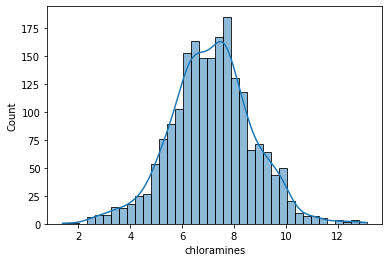

In [202]:
# histogram
sns.histplot(df["chloramines"], kde=True) # kde=True menampilkan grafik kumulatif (garis tipis)

<AxesSubplot:>

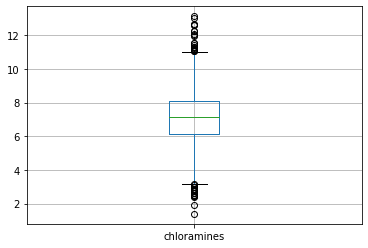

In [203]:
# boxplot
df.boxplot(column="chloramines")

- Histogram  
terlihat pada grafik, nilai modus tidak berada di tengah tengah grafik. Meskipun jika diperhatikan nilai median dan rata rata sama. Grafik juga tidak simetris dan kurang membentuk bell curve. Dapat dikatakan grafik tersebut tidak berdistribusi normal.

- Boxplot  
median terdapat di tengah tengah data. Sekilas, jarak Q1 dnegan Q2 lebih lebar daripada Q3 dengan Q2, ini berarti distribui kurang simetris. Persebaran data lebih banyak terdapat di bagian luar batas maksimum. Dapat dikatakan grafik tidak berdistribusi normal.

Normality test

In [204]:
# statistical tests

stat, p = stats.normaltest(df["chloramines"])
if p < 0.05: # p < 0.05 menunjukkan bahwa data tidak normal
    print("chloramines is not normal")
else:
    print("chloramines is normal")

chloramines is not normal


Graphical methods  
Hasil normality test mendukung bahwa grafik memang terlihat tidak berdistribusi normal karena kurang terlihat membentuk bell curve.

### sulfate

Deskripsi Statistik

In [205]:
# deskripsi statistik
desc = df["sulfate"].describe()
desc.loc["median"] = df["sulfate"].median()

# estimasi modus dengan menggunakan bantuan histogram
counts, bins = np.histogram(df["sulfate"], bins="auto")
max_bin = np.argmax(counts)
desc.loc["mode"] = bins[max_bin:max_bin+2].mean()

desc.loc["variansi"] = df["sulfate"].var()
desc.loc["range"] = df["sulfate"].max() - df["sulfate"].min()
desc.loc["IQR"] = desc.loc["75%"] - desc.loc["25%"]
desc.loc["skewness"] = df["sulfate"].skew()
desc.loc["kurtosis"] = df["sulfate"].kurtosis()

desc


count       2010.000000
mean         333.211376
std           41.211111
min          129.000000
25%          307.626986
50%          332.214113
75%          359.268147
max          481.030642
median       332.214113
mode         325.017062
variansi    1698.355672
range        352.030642
IQR           51.641161
skewness      -0.045728
kurtosis       0.786854
Name: sulfate, dtype: float64

Visualisasi

<AxesSubplot:xlabel='sulfate', ylabel='Count'>

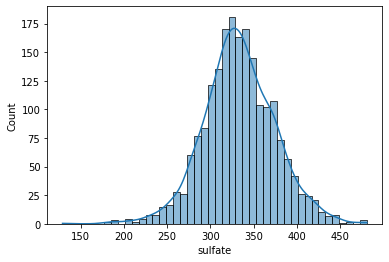

In [206]:
# histogram
sns.histplot(df["sulfate"], kde=True) # kde=True menampilkan grafik kumulatif (garis tipis)

<AxesSubplot:>

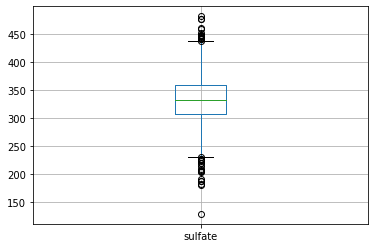

In [207]:
# boxplot
df.boxplot(column="sulfate")

- Histogram  
Grafik membentuk bell curve, nilai median dan mean hampir sama. Ini mendukung untuk mengatakan grafik berdistribusi normal, tetapi grafik kurang terlihat simetris. Terlihat pada nilai < 250 yang lebih menyebar dibandingkan di sisi kanan median. Dapat dikatakan, grafik tidak berdistribusi normal.

- Boxplot  
Median cenderung berada di atas nilai tengah persebaran data. Q1 dan Q3 terlihat simetris. Namun ada banyak banyak sekali persebaran data di bawah nilai minumum. Ini dibuktikan dengan nilai skew yang negatif yang mengindikasikan grafik membentuk negatives skew.

Normality test

In [208]:
# statistical tests

stat, p = stats.normaltest(df["sulfate"])
if p < 0.05: # p < 0.05 menunjukkan bahwa data tidak normal
    print("sulfate is not normal")
else:
    print("sulfate is normal")

sulfate is not normal


Graphical methods  
Hasil statistical mendukung kesimpulan dari eyeballing terhadap histogram bahwa sulfate tidak berdisiribusi normal. Ini didukung dengan nilai skew yang terlalu negatif dan kurtosis yang > 0.5 membuat grafik terlihat seperti tertarik ke atas.

### conductivity

Deskripsi Statistik

In [209]:
# deskripsi statistik
desc = df["solids"].describe()
desc.loc["median"] = df["solids"].median()

# estimasi modus dengan menggunakan bantuan histogram
counts, bins = np.histogram(df["solids"], bins="auto")
max_bin = np.argmax(counts)
desc.loc["mode"] = bins[max_bin:max_bin+2].mean()

desc.loc["variansi"] = df["solids"].var()
desc.loc["range"] = df["solids"].max() - df["solids"].min()
desc.loc["IQR"] = desc.loc["75%"] - desc.loc["25%"]
desc.loc["skewness"] = df["solids"].skew()
desc.loc["kurtosis"] = df["solids"].kurtosis()

desc


count       2.010000e+03
mean        2.190467e+04
std         8.625398e+03
min         3.209426e+02
25%         1.561441e+04
50%         2.092688e+04
75%         2.717053e+04
max         5.648867e+04
median      2.092688e+04
mode        1.934550e+04
variansi    7.439749e+07
range       5.616773e+04
IQR         1.155612e+04
skewness    5.910114e-01
kurtosis    3.373203e-01
Name: solids, dtype: float64

Visualisasi

<AxesSubplot:xlabel='solids', ylabel='Count'>

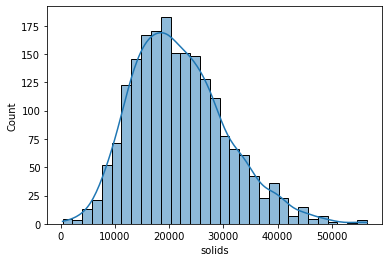

In [210]:
# histogram
sns.histplot(df["solids"], kde=True) # kde=True menampilkan grafik kumulatif (garis tipis)

<AxesSubplot:>

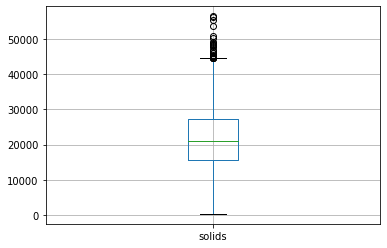

In [211]:
# boxplot
df.boxplot(column="solids")

- Histogram  
Grafik kurang membentuk bell curve. Modus berada di sebelah kiri dari median dan median berada di sebelah kiri mean. Ini menunjukkan bahwa grafik tidak berdistirbusi normal. Grafik terlihat membentuk positively skewed. Ini didukung dengan nilai skew yang positif degnan nilai > 0,5 (moderate skewed).

- Boxplot  
Nilai median tidak terdapat di tengah tengah persebaran data, nliai Q3 lebih lebar jaraknya terhadap median daripada Q1. Terdapat banyak sekali outlier di luar daerah maksimum. Ini berbanding terbalik dengan di luar daerah minimum yang tidak terdapat outlier sama sekali. Dapat dikatan grafik tidak berdistribusi normal.

Normality test

In [212]:
# statistical tests

stat, p = stats.normaltest(df["solids"])
if p < 0.05: # p < 0.05 menunjukkan bahwa data tidak normal
    print("solids is not normal")
else:
    print("solids is normal")

solids is not normal


Graphical methods  
Hasil statistical test mendukung penglihatan histogram bahwa grafik tidak berdistribusi normal. Grafik cenderung membentuk positively skewed.

### organic_carbon

Deskripsi Statistik

In [213]:
# deskripsi statistik
desc = df["organic_carbon"].describe()
desc.loc["median"] = df["organic_carbon"].median()

# estimasi modus dengan menggunakan bantuan histogram
counts, bins = np.histogram(df["organic_carbon"], bins="auto")
max_bin = np.argmax(counts)
desc.loc["mode"] = bins[max_bin:max_bin+2].mean()

desc.loc["variansi"] = df["organic_carbon"].var()
desc.loc["range"] = df["organic_carbon"].max() - df["organic_carbon"].min()
desc.loc["IQR"] = desc.loc["75%"] - desc.loc["25%"]
desc.loc["skewness"] = df["organic_carbon"].skew()
desc.loc["kurtosis"] = df["organic_carbon"].kurtosis()

desc


count       2010.000000
mean          14.357940
std            3.325770
min            2.200000
25%           12.122530
50%           14.323286
75%           16.683562
max           27.006707
median        14.323286
mode          12.477064
variansi      11.060746
range         24.806707
IQR            4.561031
skewness      -0.020220
kurtosis       0.031018
Name: organic_carbon, dtype: float64

Visualisasi

<AxesSubplot:xlabel='organic_carbon', ylabel='Count'>

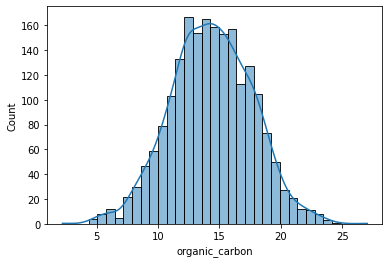

In [214]:
# histogram
sns.histplot(df["organic_carbon"], kde=True) # kde=True menampilkan grafik kumulatif (garis tipis)

<AxesSubplot:>

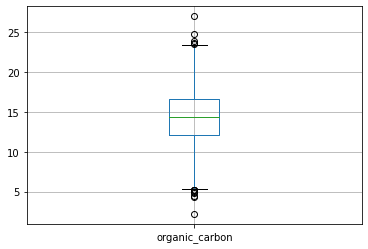

In [215]:
# boxplot
df.boxplot(column="organic_carbon")

- Histogram  
Nilai mean, modus, dan median hampir sama yaitu sekitar 14,3. Grafik juga tidak terlihat terlalu memuncak maupun melandai. Nilai median terdapat di tengah tengah distribusi data. Meksipun kemiringan grafik kurang simetris, tetapi tetap dapat dikatakan bahwa grafik berdistribusi normal.

- Boxplot  
Nilai median berada di tengah tengah distribusi data. Jarak Q1 dan Q3 juga simetris terhadap median. Jummlah outliear di kedua sisi seimbang. Dapat dikatakan grafik berdistribusi normal

Normality test

In [216]:
# statistical tests

stat, p = stats.normaltest(df["organic_carbon"])
if p < 0.05: # p < 0.05 menunjukkan bahwa data tidak normal
    print("organic_carbon is not normal")
else:
    print("organic_carbon is normal")

organic_carbon is normal


Graphical methods  
Hasil statistical method mendukung nilai penglihatan pada histogram bahwa grafik berdistribusi normal.

### trihalomethanes

Deskripsi Statistik

In [217]:
# deskripsi statistik
desc = df["trihalomethanes"].describe()
desc.loc["median"] = df["trihalomethanes"].median()

# estimasi modus dengan menggunakan bantuan histogram
counts, bins = np.histogram(df["trihalomethanes"], bins="auto")
max_bin = np.argmax(counts)
desc.loc["mode"] = bins[max_bin:max_bin+2].mean()

desc.loc["variansi"] = df["trihalomethanes"].var()
desc.loc["range"] = df["trihalomethanes"].max() - df["trihalomethanes"].min()
desc.loc["IQR"] = desc.loc["75%"] - desc.loc["25%"]
desc.loc["skewness"] = df["trihalomethanes"].skew()
desc.loc["kurtosis"] = df["trihalomethanes"].kurtosis()

desc


count       2010.000000
mean          66.400717
std           16.081109
min            8.577013
25%           55.949993
50%           66.482041
75%           77.294613
max          124.000000
median        66.482041
mode          62.990707
variansi     258.602066
range        115.422987
IQR           21.344620
skewness      -0.051383
kurtosis       0.223017
Name: trihalomethanes, dtype: float64

Visualisasi

<AxesSubplot:xlabel='trihalomethanes', ylabel='Count'>

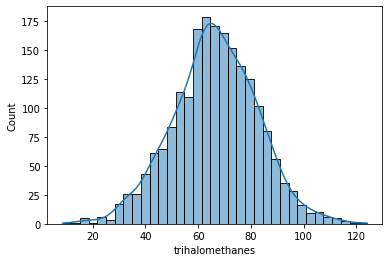

In [218]:
# histogram
sns.histplot(df["trihalomethanes"], kde=True) # kde=True menampilkan grafik kumulatif (garis tipis)

<AxesSubplot:>

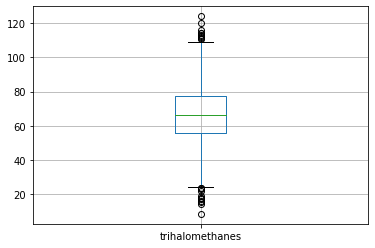

In [219]:
# boxplot
df.boxplot(column="trihalomethanes")

- Histogram  
Nilai mean, modus, dan median hampir sama yaitu sekitar 66,4. Grafik juga tidak terlihat terlalu memuncak maupun melandai. Nilai median terdapat di tengah tengah distribusi data. Meksipun kemiringan grafik kurang simetris, tetapi tetap dapat dikatakan bahwa grafik berdistribusi normal.

- Boxplot  
Nilai median berada di tengah tengah distribusi data. Jarak Q1 dan Q3 juga simetris terhadap median. Jummlah outliear di kedua sisi seimbang. Dapat dikatakan grafik berdistribusi normal

Normality test

In [220]:
# statistical tests

stat, p = stats.normaltest(df["trihalomethanes"])
if p < 0.05: # p < 0.05 menunjukkan bahwa data tidak normal
    print("trihalomethanes is not normal")
else:
    print("trihalomethanes is normal")

trihalomethanes is normal


Graphical methods  
Hasil statistical method mendukung nilai penglihatan pada histogram bahwa grafik berdistribusi normal.

### turbidity

Deskripsi Statistik

In [221]:
# deskripsi statistik
desc = df["turbidity"].describe()
desc.loc["median"] = df["turbidity"].median()

# estimasi modus dengan menggunakan bantuan histogram
counts, bins = np.histogram(df["turbidity"], bins="auto")
max_bin = np.argmax(counts)
desc.loc["mode"] = bins[max_bin:max_bin+2].mean()

desc.loc["variansi"] = df["turbidity"].var()
desc.loc["range"] = df["turbidity"].max() - df["turbidity"].min()
desc.loc["IQR"] = desc.loc["75%"] - desc.loc["25%"]
desc.loc["skewness"] = df["turbidity"].skew()
desc.loc["kurtosis"] = df["turbidity"].kurtosis()

desc


count       2010.000000
mean           3.969497
std            0.780471
min            1.450000
25%            3.442882
50%            3.967374
75%            4.514663
max            6.494749
median         3.967374
mode           3.720137
variansi       0.609135
range          5.044749
IQR            1.071781
skewness      -0.032266
kurtosis      -0.049831
Name: turbidity, dtype: float64

Visualisasi

<AxesSubplot:xlabel='turbidity', ylabel='Count'>

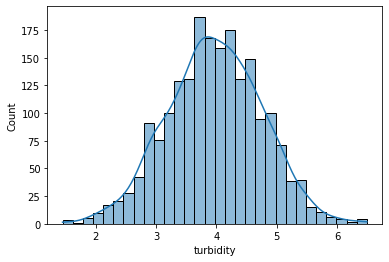

In [222]:
# histogram
sns.histplot(df["turbidity"], kde=True) # kde=True menampilkan grafik kumulatif (garis tipis)

<AxesSubplot:>

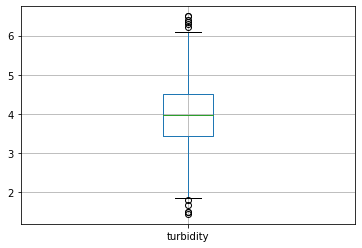

In [223]:
# boxplot
df.boxplot(column="turbidity")

- Histogram  
Nilai mean, modus, dan median hampir sama yaitu sekitar 3,96. Grafik juga tidak terlihat terlalu memuncak maupun melandai. Nilai median terdapat di tengah tengah distribusi data. Meksipun kemiringan grafik kurang simetris, tetapi tetap dapat dikatakan bahwa grafik berdistribusi normal.

- Boxplot  
Nilai median berada di tengah tengah distribusi data. Jarak Q1 dan Q3 juga simetris terhadap median. Jummlah outliear di kedua sisi seimbang. Dapat dikatakan grafik berdistribusi normal

Normality test

In [224]:
# statistical tests

stat, p = stats.normaltest(df["turbidity"])
if p < 0.05: # p < 0.05 menunjukkan bahwa data tidak normal
    print("turbidity is not normal")
else:
    print("turbidity is normal")

turbidity is normal


Graphical methods  
Hasil statistical method mendukung nilai penglihatan pada histogram bahwa grafik berdistribusi normal.

## Tes Hipotesis
> Untuk setiap hipotesis akan dituliskan 6 langkah testing beserta boxplot
### 1 sampel
a. Nilai rata-rata pH di atas 7?  
1) Hipotesis nol H<sub>0</sub>:  $\mu$ = 7  
2) Hipotesis alternatif H<sub>1</sub>: $\mu$ > 7  
3) Tingkat signifikasi: α = 0.05  
4) Uji statistik yang sesuai dan critical region  
5) Uji statistik dari data sample dan p-value  

In [225]:
print("Digunakan uji statistik rata rata satu sampel menggunakan z test dengan mengganti sigma dengan s karena nilai n > 30")

print("\n== Informasi Sampel ==")

mu0 = 7         # H0: mu = 7
n = df.shape[0] # banyak sampel
print("n =", n)

α = 0.05
print("Tingkat signifikansi α =", α)

s = df["pH"].std()    # standar deviasi sampel
print("std =", s)

mean = df["pH"].mean()  # rata-rata sampel
print("mean =", mean)

print("\n== Uji Statistik ==")
critical_region = stats.norm.ppf(1 - α)
print("critical region >", critical_region)

z = (mean - mu0) / (s / np.sqrt(n))
print("z =", z)

p_value = stats.norm.sf(abs(z))
print("p-value =", p_value)


Digunakan uji statistik rata rata satu sampel menggunakan z test dengan mengganti sigma dengan s karena nilai n > 30

== Informasi Sampel ==
n = 2010
Tingkat signifikansi α = 0.05
std = 1.5728029470456655
mean = 7.0871927687138285

== Uji Statistik ==
critical region > 1.6448536269514722
z = 2.485445147379887
p-value = 0.006469476288896462


6) Keputusan: 

In [226]:
if z > critical_region:
    print("z > critical region")
else:
    print("z <= critical region")

if p_value >= α:
    print("p-value >= α")
else:
    print("p-value < α")

if z > critical_region and p_value < α:
    print("Hipotesis nol ditolak")
else:
    print("Hipotesis nol diterima")

z > critical region
p-value < α
Hipotesis nol ditolak


Boxplot

<AxesSubplot:>

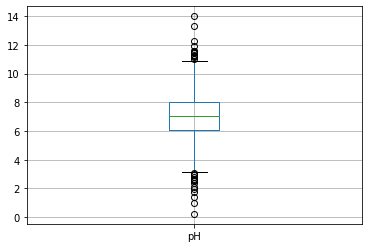

In [227]:
# boxplot ph
df.boxplot(column="pH")

b. Nilai Rata-rata Hardness tidak sama dengan 205?  
1) Hipotesis nol H<sub>0</sub>: $\mu$ = 205  
2) Hipotesis alternatif H<sub>1</sub>: $\mu$ ≠ 205  
3) Tingkat signifikasi: α = 0.05  
4) Uji statistik yang sesuai dan critical region  
5) Uji statistik dari data sample dan p-value  


In [266]:
print("Digunakan uji statistik rata rata satu sampel menggunakan z test dengan mengganti sigma dengan s karena nilai n > 30")

print("\n== Informasi Sampel ==")

mu0 = 205         # H0: mu = 205
n = df.shape[0] # banyak sampel
print("n =", n)

α = 0.05
print("Tingkat signifikansi α =", α)

s = df["hardness"].std()    # standar deviasi sampel
print("std =", s)

mean = df["hardness"].mean()  # rata-rata sampel
print("mean =", mean)

print("\n== Uji Statistik ==")
critical_region_kanan = stats.norm.ppf(1 - α/2)
critical_region_kiri = stats.norm.ppf(α/2)
print("critical region >", critical_region_kanan)
print("atau")
print("critical region <", critical_region_kiri)

z = (mean - mu0) / (s / np.sqrt(n))
print("z =", z)

p_value = 2 * stats.norm.sf(abs(z))
print("p-value =", p_value)


Digunakan uji statistik rata rata satu sampel menggunakan z test dengan mengganti sigma dengan s karena nilai n > 30

== Informasi Sampel ==
n = 2010
Tingkat signifikansi α = 0.05
std = 32.643165859429864
mean = 195.96920903783524

== Uji Statistik ==
critical region > 1.959963984540054
atau
critical region < -1.9599639845400545
z = -12.403137170010732
p-value = 2.5128904895144654e-35


6) Keputusan: 


In [229]:
if z > critical_region_kanan:
    print("z > critical region kanan")
elif z < critical_region_kiri:
    print("z < critical region kiri")
else:
    print("critical region kiri < z < critical region kanan")

if p_value >= α:
    print("p-value >= α")
else:
    print("p-value < α")

if (z > critical_region_kanan or z < critical_region_kiri) and p_value < α:
    print("Hipotesis nol ditolak")
else:
    print("Hipotesis nol diterima")

z < critical region kiri
p-value < α
Hipotesis nol ditolak


Boxplot

<AxesSubplot:>

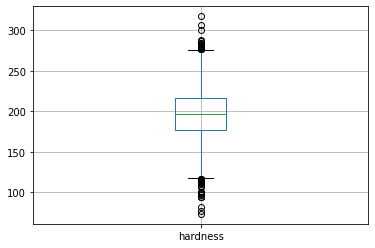

In [230]:
# boxplot hardness
df.boxplot(column="hardness")


c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?  
1) Hipotesis nol H<sub>0</sub>: $\mu$ = 21900  
2) Hipotesis alternatif H<sub>1</sub>: $\mu$ ≠ 21900  
3) Tingkat signifikasi: α = 0.05  
4) Uji statistik yang sesuai dan critical region  
5) Uji statistik dari data sample dan p-value  


In [231]:
print("Digunakan uji statistik rata rata satu sampel menggunakan z test dengan mengganti sigma dengan s karena nilai n > 30")

print("== Informasi Sampel ==")

mu0 = 21900         # H0: mu = 21900
n = 100 # banyak sampel
print("n =", n)

α = 0.05
print("Tingkat signifikansi α =", α)

s = df["solids"][:100].std()    # standar deviasi sampel
print("s =", s)

mean = df["solids"][:100].mean()  # rata-rata sampel
print("mean =", mean)

print("\n== Uji Statistik ==")
critical_region_kanan = stats.norm.ppf(1 - α/2)
critical_region_kiri = stats.norm.ppf(α/2)
print("critical region >", critical_region_kanan)
print("atau")
print("critical region <", critical_region_kiri)

z = (mean - mu0) / (s / np.sqrt(n))
print("z =", z)

p_value = 2 * stats.norm.sf(abs(z))
print("p-value =", p_value)


Digunakan uji statistik rata rata satu sampel menggunakan z test dengan mengganti sigma dengan s karena nilai n > 30
== Informasi Sampel ==
n = 100
Tingkat signifikansi α = 0.05
s = 7935.967706199006
mean = 22347.334446383426

== Uji Statistik ==
critical region > 1.959963984540054
atau
critical region < -1.9599639845400545
z = 0.5636797715721551
p-value = 0.5729720864655174


6) keputusan: 


In [232]:
if z > critical_region_kanan:
    print("z > critical region kanan")
elif z < critical_region_kiri:
    print("z < critical region kiri")
else:
    print("critical region kiri < z < critical region kanan")

if p_value >= α:
    print("p-value >= α")
else:
    print("p-value < α")

if (z > critical_region_kanan or z < critical_region_kiri) and p_value < α:
    print("Hipotesis nol ditolak")
else:
    print("Hipotesis nol diterima")

critical region kiri < z < critical region kanan
p-value >= α
Hipotesis nol diterima


Boxplot

<AxesSubplot:>

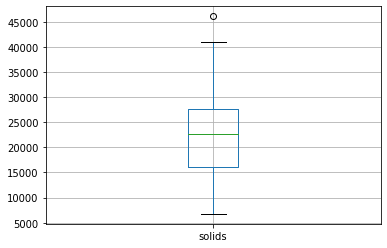

In [233]:
# boxplot 100 first row solids
df_100_solids = df[:100]
df_100_solids.boxplot(column="solids")


d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?  
1) Hipotesis nol H<sub>0</sub>: $\hat{p}$ = 0.1  
2) Hipotesis alternatif H<sub>1</sub>: $\hat{p}$ ≠ 0.1  
3) Tingkat signifikasi: α = 0.05  
4) Uji statistik yang sesuai dan critical region  
5) Uji statistik dari data sample dan p-value  


In [234]:
print("Digunakan uji statistik proporsi satu sampel menggunakan binomial didekati normal karena jumlan n > 30")

print("\n== Informasi Sampel ==")
x = len(df["conductivity"].loc[df["conductivity"] > 450])
print("x =", x)

n = len(df["conductivity"]) # banyak sampel
print("n =", n)

p0 = 0.1
print("p0 =", p0)

p_hat = x / n
print("p_hat =", p_hat)

α = 0.05
print("Tingkat signifikansi α =", α)

print("\n== Uji Statistik ==")
critical_region_kanan = stats.norm.ppf(1 - α/2)
critical_region_kiri = stats.norm.ppf(α/2)
print("critical region >", critical_region_kanan)
print("atau")
print("critical region <", critical_region_kiri)

z = (p_hat - p0) / np.sqrt(p_hat * (1 - p_hat) / n)
print("z =", z)

p_value = 2 * stats.norm.sf(abs(z))
print("p-value =", p_value)


Digunakan uji statistik proporsi satu sampel menggunakan binomial didekati normal karena jumlan n > 30

== Informasi Sampel ==
x = 745
n = 2010
p0 = 0.1
p_hat = 0.3706467661691542
Tingkat signifikansi α = 0.05

== Uji Statistik ==
critical region > 1.959963984540054
atau
critical region < -1.9599639845400545
z = 25.123117485249054
p-value = 2.7805643687767913e-139


6) Keputusan: 


In [235]:
if z > critical_region_kanan:
    print("z > critical region kanan")
elif z < critical_region_kiri:
    print("z < critical region kiri")
else:
    print("critical region kiri < z < critical region kanan")

if p_value >= α:
    print("p-value >= α")
else:
    print("p-value < α")

if (z > critical_region_kanan or z < critical_region_kiri) and p_value < α:
    print("Hipotesis nol ditolak")
else:
    print("Hipotesis nol diterima")

z > critical region kanan
p-value < α
Hipotesis nol ditolak


Boxplot

<AxesSubplot:>

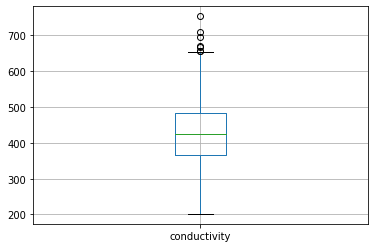

In [236]:
# boxplot conductivity
df.boxplot(column="conductivity")


e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?  
1) Hipotesis nol H<sub>0</sub>: $\hat{p}$ = 0.05  
2) Hipotesis alternatif H<sub>1</sub>: $\hat{p}$ < 0.05  
3) Tingkat signifikasi: α = 0.05  
4) Uji statistik yang sesuai dan critical region  
5) Uji statistik dari data sample dan p-value  


In [237]:
print("Digunakan uji statistik proporsi satu sampel menggunakan binomial didekati normal karena jumlan n > 30")

print("\n== Informasi Sampel ==")
x = len(df["trihalomethanes"].loc[df["trihalomethanes"] < 40])
print("x =", x)

n = len(df["trihalomethanes"]) # banyak sampel
print("n =", n)

p0 = 0.05
print("p0 =", p0)

p_hat = x / n
print("p_hat =", p_hat)

α = 0.05
print("Tingkat signifikansi α =", α)

print("\n== Uji Statistik ==")
critical_region = stats.norm.ppf(α)
print("critical region <", critical_region)

z = (p_hat - p0) / np.sqrt(p_hat * (1 - p_hat) / n)
print("z =", z)

p_value = stats.norm.sf(abs(z))
print("p-value =", p_value)


Digunakan uji statistik proporsi satu sampel menggunakan binomial didekati normal karena jumlan n > 30

== Informasi Sampel ==
x = 106
n = 2010
p0 = 0.05
p_hat = 0.0527363184079602
Tingkat signifikansi α = 0.05

== Uji Statistik ==
critical region < -1.6448536269514729
z = 0.5488760912378876
p-value = 0.2915452434643749


6) Keputusan: 



In [238]:
if z > critical_region:
    print("z > critical region")
else:
    print("z <= critical region")

if p_value >= α:
    print("p-value >= α")
else:
    print("p-value < α")

if (z < critical_region) and p_value < α:
    print("Hipotesis nol ditolak")
else:
    print("Hipotesis nol diterima")

z > critical region
p-value >= α
Hipotesis nol diterima


Boxplot

<AxesSubplot:>

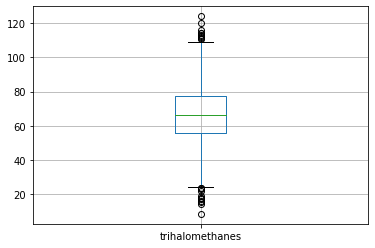

In [239]:
# boxplot trihalomethanes
df.boxplot(column="trihalomethanes")

### 2 sampel
a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

μ1 = rata-rata bagian awal <br>
μ2 = rata-rata bagian akhir

1) Hipotesis nol: H<sub>0</sub> = (μ1 - μ2 = 0) <br> 
2) Hipotesis alternatif: H<sub>1</sub> = (μ1 - μ2 $\ne$ 0)  
3) Tingkat signifikasi: $\alpha$ = 0.05  

Daerah kritis $z < -z_{\alpha_{/2}} \lor z > z_{\alpha_{/2}}$

Terdapat 2010 instance/individu dalam populasi, sehingga bagian awal berjumlah 1005 instance dan bagian akhir berjumlah 1005 instance

Uji hipotesis dilakukan dengan menghitung Z dari sampel bagian awal dan sampel bagian akhir

$$ z = \frac{(\bar{x_{1}} - \bar{x_{2}}) - d_{0}} {\sqrt{\sigma_{1}^{2}/n_{1} + \sigma_{2}^{2}/n_{2}}}$$

Z akan dibandingkan dengan daerah kritis yang telah ditentukan berdasarkan $\alpha$

Lalu, juga dilakukan test p value dengan membandingkan nilai probabilitas Z dengan nilai $\alpha$

Jika Z memasuki daerah kritis atau p value kurang dari $\alpha$, maka dapat diambil kesimpulan H0 ditolak

Jika Z di luar daerah kritis dan p value lebih dari $\alpha$, maka H0 diterima

4) Uji statistik yang sesuai dan critical region

[]

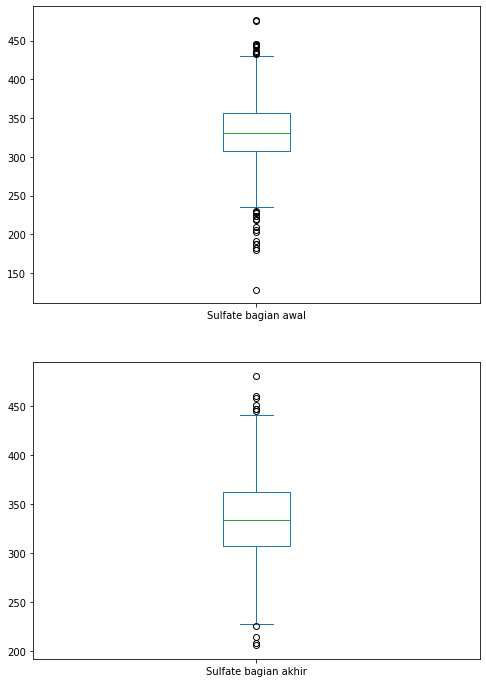

In [240]:
α = 0.05
sulfateAwal = df["sulfate"][:len(df)//2]
nAwal5a = len(sulfateAwal)
miuAwal5a = sulfateAwal.mean()
sigmaAwal5a = sulfateAwal.std()

sulfateAkhir = df["sulfate"][len(df)//2:]
nAkhir5a = len(sulfateAkhir)
miuAkhir5a = sulfateAkhir.mean()
sigmaAkhir5a = sulfateAkhir.std()

fig, axs = plt.subplots(2, figsize=(8,12))

sulfateAwal.plot.box(label = "Sulfate bagian awal", ax=axs[0])
sulfateAkhir.plot.box(label = "Sulfate bagian akhir", ax=axs[1])
plt.plot()

5) Uji statistik dari data sample dan p-value

In [241]:
d0 = 0
z5a = ((miuAwal5a-miuAkhir5a)-d0)/np.sqrt((pow(sigmaAwal5a,2)/nAwal5a)+(pow(sigmaAkhir5a,2)/nAkhir5a))
criticalValue5a = (stats.norm.ppf(1-α/2))
if z5a < 0:
  pValue5a = 2*(stats.norm.cdf(z5a))
else:
  pValue5a = 2*(stats.norm.sf(z5a))
print("Nilai z adalah " + str(z5a))
print("Nilai p adalah " + str(pValue5a))
print("Nilai kritis adalah " + str(-criticalValue5a) + " dan " + str(criticalValue5a))
print()
print(f"Rentang kritis : Z < {-criticalValue5a} atau Z > {criticalValue5a}")

Nilai z adalah -2.0752690696871983
Nilai p adalah 0.0379616043851286
Nilai kritis adalah -1.959963984540054 dan 1.959963984540054

Rentang kritis : Z < -1.959963984540054 atau Z > 1.959963984540054



6) Keputusan :

In [242]:
if z5a > criticalValue5a or z5a < -criticalValue5a:
    print("Z masuk dalam daerah kritis, H0 pasti ditolak")
else:
    print("Z di luar daerah kritis, H0 mungkin diterima")

if pValue5a < α:
    print("P value kurang dari alpha, H0 pasti ditolak")
else:
    print("P value lebih dari alpha, H0 mungkin diterima")

if (z5a > criticalValue5a or z5a < -criticalValue5a) or (pValue5a < α):
    print("Karena salah satu syarat ditolak, maka kesimpulannya H0 ditolak")
    print("Sehingga rata-rata kedua bagian itu tidak sama")
else:
    print("Karena kedua syarat terpenuhi, maka kesimpulannya H0 diterima")
    print("Sehingga rata-rata kedua bagian itu sama")

Z masuk dalam daerah kritis, H0 pasti ditolak
P value kurang dari alpha, H0 pasti ditolak
Karena salah satu syarat ditolak, maka kesimpulannya H0 ditolak
Sehingga rata-rata kedua bagian itu tidak sama


b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15? 

μ1 = rata-rata bagian awal <br>
μ2 = rata-rata bagian akhir

1. Hipotesis nol: H<sub>0</sub> =  (μ1 - μ2 = 0.15) <br>  
2. Hipotesis alternatif: H<sub>1</sub> = (μ1 - μ2 $\ne$ 0.15)  
3. Tingkat signifikasi: $\alpha$ = 0.05  

Daerah kritis $z < -z_{\alpha_{/2}} \lor z > z_{\alpha_{/2}}$

Terdapat 2010 instance/individu dalam populasi, sehingga bagian awal berjumlah 1005 instance dan bagian akhir berjumlah 1005 instance

Uji hipotesis dilakukan dengan menghitung Z dari sampel bagian awal dan sampel bagian akhir

$$ z = \frac{(\bar{x_{1}} - \bar{x_{2}}) - d_{0}} {\sqrt{\sigma_{1}^{2}/n_{1} + \sigma_{2}^{2}/n_{2}}}$$

Z akan dibandingkan dengan daerah kritis yang telah ditentukan berdasarkan $\alpha$

Lalu, juga dilakukan test p value dengan membandingkan nilai probabilitas Z dengan nilai $\alpha$

Jika Z memasuki daerah kritis atau p value kurang dari $\alpha$, maka dapat diambil kesimpulan H0 ditolak

Jika Z di luar daerah kritis dan p value lebih dari $\alpha$, maka H0 diterima

4) Uji statistik yang sesuai dan critical region

[]

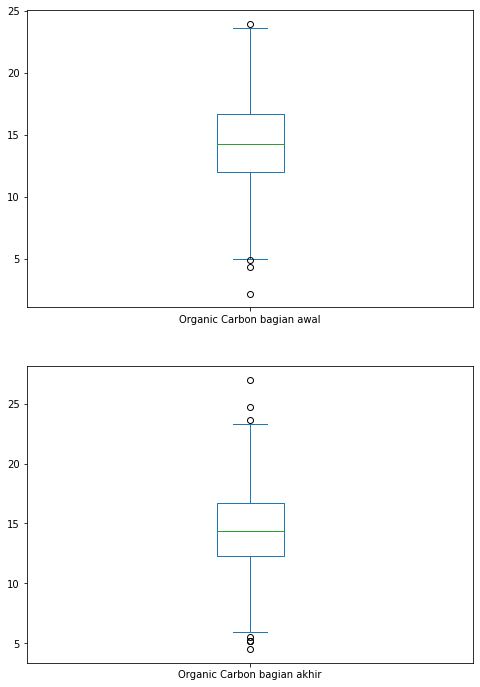

In [243]:
α = 0.05
organicCarbonAwal = df["organic_carbon"][:len(df)//2]
nAwal5b = len(organicCarbonAwal)
miuAwal5b = organicCarbonAwal.mean()
sigmaAwal5b = organicCarbonAwal.std()

organicCarbonAkhir = df["organic_carbon"][len(df)//2:]
nAkhir5b = len(organicCarbonAkhir)
miuAkhir5b = organicCarbonAkhir.mean()
sigmaAkhir5b = organicCarbonAkhir.std()

fig, axs = plt.subplots(2, figsize=(8,12))

organicCarbonAwal.plot.box(label = "Organic Carbon bagian awal", ax=axs[0])
organicCarbonAkhir.plot.box(label = "Organic Carbon bagian akhir", ax=axs[1])
plt.plot()

5) Uji statistik dari data sample dan p-value

In [244]:
d0 = 0.15
z5b = ((miuAwal5b-miuAkhir5b)-d0)/np.sqrt((pow(sigmaAwal5b,2)/nAwal5b)+(pow(sigmaAkhir5b,2)/nAkhir5b))
criticalValue5b = (stats.norm.ppf(1-α/2))
if z5b < 0:
  pValue5b = 2*(stats.norm.cdf(z5b))
else:
  pValue5b = 2*(stats.norm.sf(z5b))
print("Nilai z adalah " + str(z5b))
print("Nilai p adalah " + str(pValue5b))
print("Nilai kritis adalah " + str(-criticalValue5b) + " dan " + str(criticalValue5b))
print()
print(f"Rentang kritis : Z < {-criticalValue5b} atau Z > {criticalValue5b}")

Nilai z adalah -2.413145517798807
Nilai p adalah 0.01581550381760006
Nilai kritis adalah -1.959963984540054 dan 1.959963984540054

Rentang kritis : Z < -1.959963984540054 atau Z > 1.959963984540054


6) Keputusan: 

In [245]:
if z5b > criticalValue5b or z5b < -criticalValue5b:
    print("Z masuk dalam daerah kritis, H0 pasti ditolak")
else:
    print("Z di luar daerah kritis, H0 mungkin diterima")

if pValue5a < α:
    print("P value kurang dari alpha, H0 pasti ditolak")
else:
    print("P value lebih dari alpha, H0 mungkin diterima")

if (z5b > criticalValue5b or z5b < -criticalValue5b) or (pValue5b < α):
    print("Karena salah satu syarat ditolak, maka kesimpulannya H0 ditolak")
    print("Sehingga rata-rata bagian awal tidak lebih besar 0.15 dari bagian akhir")
else:
    print("Karena kedua syarat terpenuhi, maka kesimpulannya H0 diterima")
    print("Sehingga rata-rata bagian awal lebih besar 0.15 dari bagian akhir")

Z masuk dalam daerah kritis, H0 pasti ditolak
P value kurang dari alpha, H0 pasti ditolak
Karena salah satu syarat ditolak, maka kesimpulannya H0 ditolak
Sehingga rata-rata bagian awal tidak lebih besar 0.15 dari bagian akhir


c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya? 

μ1 = rata-rata 100 baris pertama <br>
μ2 = rata-rata 100 baris terakhir

1. Hipotesis nol: H<sub>0</sub> =  (μ1 - μ2 = 0) <br>  
2. Hipotesis alternatif: H<sub>1</sub> =  (μ1 - μ2 $\ne$ 0)  
3. Tingkat signifikasi: α = 0.05  

Daerah kritis $z < -z_{\alpha_{/2}} \lor z > z_{\alpha_{/2}}$

Terdapat 2010 instance/individu dalam populasi, sehingga bagian awal berjumlah 1005 instance dan bagian akhir berjumlah 1005 instance

Uji hipotesis dilakukan dengan menghitung Z dari sampel sejumlah 100 pertama yang diambil dari populasi bagian awal dan 100 terakhir yang diambil dari bagian akhir

$$ z = \frac{(\bar{x_{1}} - \bar{x_{2}}) - d_{0}} {\sqrt{\sigma_{1}^{2}/n_{1} + \sigma_{2}^{2}/n_{2}}}$$

Z akan dibandingkan dengan daerah kritis yang telah ditentukan berdasarkan $\alpha$

Lalu, juga dilakukan test p value dengan membandingkan nilai probabilitas Z dengan nilai $\alpha$

Jika Z memasuki daerah kritis atau p value kurang dari $\alpha$, maka dapat diambil kesimpulan H0 ditolak

Jika Z di luar daerah kritis dan p value lebih dari $\alpha$, maka H0 diterima

4) Uji statistik yang sesuai dan critical region

[]

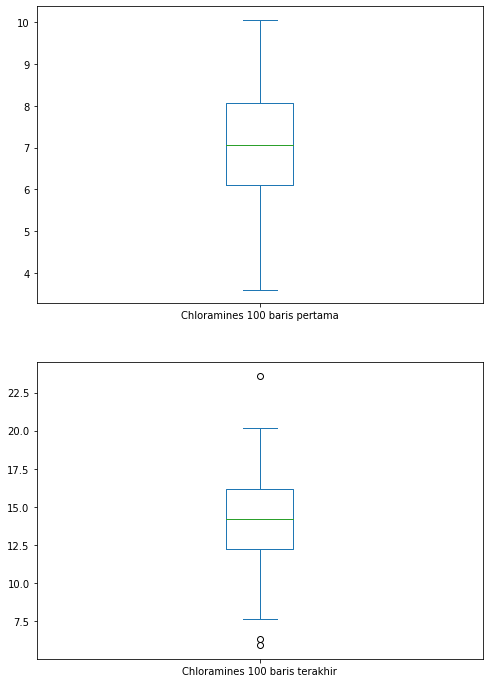

In [246]:
α = 0.05
nAwal5c = 100
chloraminesAwal = df["chloramines"][:nAwal5c]
miuAwal5c = chloraminesAwal.mean()
sigmaAwal5c = chloraminesAwal.std()

nAkhir5c = 100
chloraminesAkhir = df["organic_carbon"][len(df)-nAkhir5c:]
miuAkhir5c = chloraminesAkhir.mean()
sigmaAkhir5c = chloraminesAkhir.std()

fig, axs = plt.subplots(2, figsize=(8,12))

chloraminesAwal.plot.box(label = "Chloramines 100 baris pertama", ax=axs[0])
chloraminesAkhir.plot.box(label = "Chloramines 100 baris terakhir", ax=axs[1])
plt.plot()

5) Uji statistik dari data sample dan p-value

In [247]:
d0 = 0
z5c = ((miuAwal5c-miuAkhir5c)-d0)/np.sqrt((pow(sigmaAwal5c,2)/nAwal5c)+(pow(sigmaAkhir5c,2)/nAkhir5c))
criticalValue5c = (stats.norm.ppf(1-α/2))
if z5c < 0:
  pValue5c = 2*(stats.norm.cdf(z5c))
else:
  pValue5c = 2*(stats.norm.sf(z5c))
print("Nilai z adalah " + str(z5c))
print("Nilai p adalah " + str(pValue5c))
print("Nilai kritis adalah " + str(-criticalValue5c) + " dan " + str(criticalValue5c))
print()
print(f"Rentang kritis : Z < {-criticalValue5c} atau Z > {criticalValue5c}")

Nilai z adalah -20.078518196114587
Nilai p adalah 1.1373712316589296e-89
Nilai kritis adalah -1.959963984540054 dan 1.959963984540054

Rentang kritis : Z < -1.959963984540054 atau Z > 1.959963984540054


6) Keputusan: 

In [248]:
if z5c > criticalValue5c or z5c < -criticalValue5c:
    print("Z masuk dalam daerah kritis, H0 pasti ditolak")
else:
    print("Z di luar daerah kritis, H0 mungkin diterima")

if pValue5a < α:
    print("P value kurang dari alpha, H0 pasti ditolak")
else:
    print("P value lebih dari alpha, H0 mungkin diterima")

if (z5c > criticalValue5c or z5c < -criticalValue5c) or (pValue5c < α):
    print("Karena salah satu syarat ditolak, maka kesimpulannya H0 ditolak")
    print("Sehingga rata-rata kedua bagian itu tidak sama")
else:
    print("Karena kedua syarat terpenuhi, maka kesimpulannya H0 diterima")
    print("Sehingga rata-rata kedua bagian itu sama")

Z masuk dalam daerah kritis, H0 pasti ditolak
P value kurang dari alpha, H0 pasti ditolak
Karena salah satu syarat ditolak, maka kesimpulannya H0 ditolak
Sehingga rata-rata kedua bagian itu tidak sama



d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity? 

p1 = proporsi bagian awal <br>
p2 = proporsi bagian akhir

1. Hipotesis nol: H<sub>0</sub> = (p1 = p2) <br>  
2. Hipotesis alternatif: H<sub>1</sub> = (p1 > p2)  -> (one-tailed test)  
3. Tingkat signifikasi: α = 0.05  

Daerah kritis $z > z_\alpha$

Terdapat 2010 instance/individu dalam populasi, sehingga bagian awal berjumlah 1005 instance dan bagian akhir berjumlah 1005 instance

Uji hipotesis dilakukan dengan menghitung Z dari sampel bagian awal dan sampel bagian akhir

$$ z = \frac{\hat{p_{1}}-\hat{p_{2}}}{\sqrt{\hat{p}\hat{q}(1/n_{1}+1/n_{2})}} $$

Z akan dibandingkan dengan daerah kritis yang telah ditentukan berdasarkan $\alpha$

Lalu, juga dilakukan test p value dengan membandingkan nilai probabilitas Z dengan nilai $\alpha$

Jika Z memasuki daerah kritis atau p value kurang dari $\alpha$, maka dapat diambil kesimpulan H0 ditolak

Jika Z di luar daerah kritis dan p value lebih dari $\alpha$, maka H0 diterima

4) Uji statistik yang sesuai dan critical region

[]

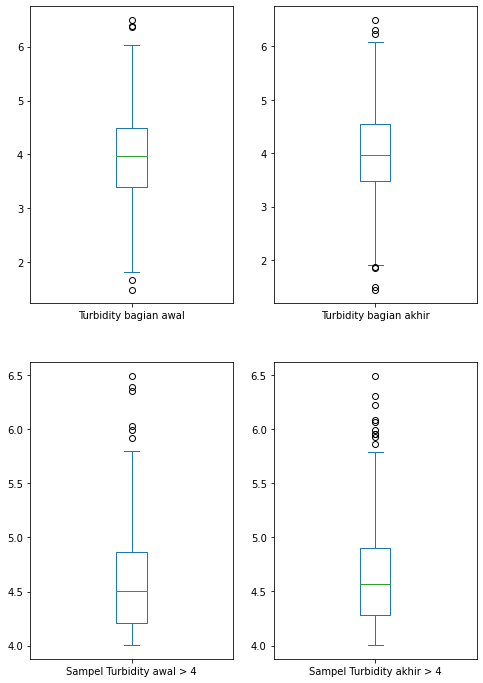

In [249]:
α = 0.05
turbidityAwal = df["turbidity"][:len(df)//2]
nAwal5d = len(turbidityAwal)
sampleAwal5d = turbidityAwal[turbidityAwal > 4]
xAwal5d = len(sampleAwal5d)
pAwal5d = xAwal5d / nAwal5d

turbidityAkhir = df["turbidity"][len(df)//2:]
nAkhir5d = len(turbidityAkhir)
sampleAkhir5d = turbidityAkhir[turbidityAkhir > 4]
xAkhir5d = len(sampleAkhir5d)
pAkhir5d = xAkhir5d / nAkhir5d

fig, axs = plt.subplots(2, 2, figsize=(8,12))

turbidityAwal.plot.box(label = "Turbidity bagian awal", ax=axs[0,0])
turbidityAkhir.plot.box(label = "Turbidity bagian akhir", ax=axs[0,1])
sampleAwal5d.plot.box(label = "Sampel Turbidity awal > 4", ax=axs[1,0])
sampleAkhir5d.plot.box(label = "Sampel Turbidity akhir > 4", ax=axs[1,1])
plt.plot()

5) Uji statistik dari data sample dan p-value

In [250]:
criticalValue5d = stats.norm.ppf(1-α)
p = (xAwal5d + xAkhir5d) / (nAwal5d + nAkhir5d)             # Probability Z
q = 1-p                                                     # Probability non-Z
z5d = (pAwal5d - pAkhir5d) / np.sqrt(p*q * (1/nAwal5d + 1/nAkhir5d))
if z5d < 0:
  pValue5d = (stats.norm.cdf(z5d))
else:
  pValue5d = (stats.norm.sf(z5d))

print("Banyak Turbudity awal yang lebih dari 4 adalah " + str(xAwal5d) + " dari " + str(nAwal5d))
print("Banyak Turbudity akhir yang lebih dari 4 adalah " + str(xAkhir5d) + " dari " + str(nAkhir5d))
print()
print("Proporsi bagian awal adalah " + str(pAwal5d))
print("Proporsi bagian akhir adalah " + str(pAkhir5d))
print("Proporsi gabungan adalah " + str(p))
print()
print("Nilai z adalah " + str(z5d))
print("Nilai kritis adalah " + str(criticalValue5d))
print()
print(f"Rentang kritis : Z > {criticalValue5d}")

Banyak Turbudity awal yang lebih dari 4 adalah 486 dari 1005
Banyak Turbudity akhir yang lebih dari 4 adalah 489 dari 1005

Proporsi bagian awal adalah 0.4835820895522388
Proporsi bagian akhir adalah 0.48656716417910445
Proporsi gabungan adalah 0.48507462686567165

Nilai z adalah -0.13388958661778735
Nilai kritis adalah 1.6448536269514722

Rentang kritis : Z > 1.6448536269514722


6) Keputusan:

In [251]:
if z5d > criticalValue5d:
    print("Z masuk dalam daerah kritis, H0 pasti ditolak")
else:
    print("Z di luar daerah kritis, H0 mungkin diterima")

if pValue5d < α:
    print("P value kurang dari alpha, H0 pasti ditolak")
else:
    print("P value lebih dari alpha, H0 mungkin diterima")

if (z5d > criticalValue5d) or (pValue5d < α):
    print("Karena salah satu syarat ditolak, maka kesimpulannya H0 ditolak")
    print("Sehingga proporsi bagian awal tidak lebih besar dari bagian akhir")
else:
    print("Karena kedua syarat terpenuhi, maka kesimpulannya H0 diterima")
    print("Sehingga proporsi bagian awal lebih besar dari bagian akhir")

Z di luar daerah kritis, H0 mungkin diterima
P value lebih dari alpha, H0 mungkin diterima
Karena kedua syarat terpenuhi, maka kesimpulannya H0 diterima
Sehingga proporsi bagian awal lebih besar dari bagian akhir


e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

${σ_{1}}^{2}$ = variansi bagian awal <br>
${σ_{2}}^{2}$ = variansi bagian akhir

1. Hipotesis nol: H<sub>0</sub> =  (${σ_{1}}^{2}$ = ${σ_{2}}^{2}$) <br>  
2. Hipotesis alternatif: H<sub>1</sub> =  (${σ_{1}}^{2}$ $\ne$ ${σ_{2}}^{2}$)  
3. Tingkat signifikasi: α = 0.05  

Daerah kritis $f > f_{1-\alpha/2}(v_1,v_2) \lor (0 < f < f_{\alpha/2}(v_1,v_2))$ dengan ${v_1 = n_1 - 1}$ dan ${v_2 = n_2 - 1}$

Uji hipotesis dilakukan dengan mencari nilai distribusi f dan membandingkannya dengan daerah kritis

Distribusi f dihitung dengan menggunakan rumus dibawah, dengan ${s_1}^2$ dan ${s_2}^2$ merupakan nilai variansi sampel

Sampel diambil sejumlah 152 dari kolom bagian awal dan akhir

$$ f = \frac{{s_1}^{2}}{{s_2}^{2}} $$

Jika nilai f masuk ke dalam daerah kritis, maka H0 ditolak

Jika nilai f di luar daerah kritis, maka H0 diterima

4) Uji statistik yang sesuai dan critical region

[]

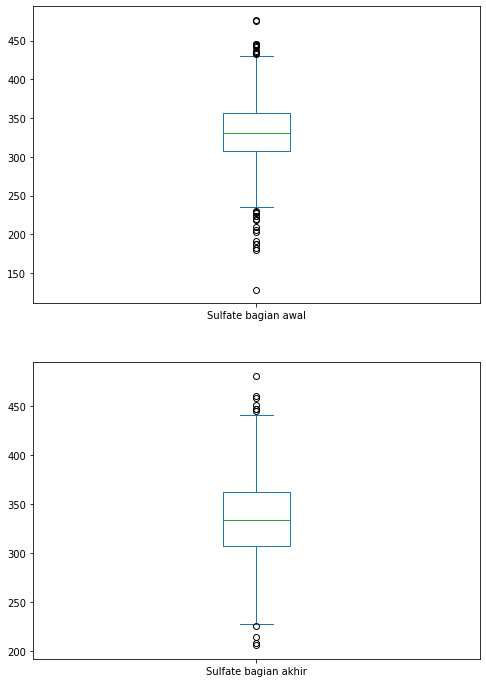

In [252]:
α = 0.05
sulfateAwal = df["sulfate"][:len(df)//2]
nAwal5e = len(sulfateAwal)
vAwal5e = nAwal5e-1
varAwal5e = sulfateAwal.var()

sulfateAkhir = df["sulfate"][len(df)//2:]
nAkhir5e = len(sulfateAkhir)
vAkhir5e = nAkhir5e-1
varAkhir5e = sulfateAkhir.var()

fig, axs = plt.subplots(2, figsize=(8,12))

sulfateAwal.plot.box(label = "Sulfate bagian awal", ax=axs[0])
sulfateAkhir.plot.box(label = "Sulfate bagian akhir", ax=axs[1])
plt.plot()

5) Uji statistik dari data sample dan p-value

In [253]:
f = varAwal5e / varAkhir5e
criticalValueRight5e = stats.f.ppf(1-(α/2), vAwal5e, vAkhir5e)
criticalValueLeft5e = stats.f.ppf(α/2, vAwal5e, vAkhir5e)

print("Nilai f adalah " + str(f))
print("Nilai kritis adalah " + str(criticalValueLeft5e) + " dan " + str(criticalValueRight5e))
print()
print(f"Rentang kritis : 0 < f < {criticalValueLeft5e} atau f > {criticalValueRight5e}")

Nilai f adalah 1.0152511043950063
Nilai kritis adalah 0.883572344355818 dan 1.1317692392568777

Rentang kritis : 0 < f < 0.883572344355818 atau f > 1.1317692392568777


6) Keputusan: 

In [254]:
if  (0 < f < criticalValueLeft5e) or (f > criticalValueRight5e):
    print("Z masuk dalam daerah kritis, H0 ditolak")
    print("Sehingga variansi bagian awal tidak sama dengan bagian akhir")
else:
    print("Z di luar daerah kritis, H0 diterima")
    print("Sehingga variansi bagian awal sama dengan bagian akhir")

Z di luar daerah kritis, H0 diterima
Sehingga variansi bagian awal sama dengan bagian akhir


## Tes Korelasi
>Test korelasi : Tentukan apakah setiap kolom non-target berkorelasi dengan kolom target,
dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

>Tes Korelasi yang digunakan adalah Pearson's Correlation Coefficient, mengukur hubungan linier antar variabel. Secara matematis jika (σXY) adalah kovarian antara X dan Y, dan (σX) adalah simpangan baku dari X, maka koefisien korelasi Pearson ρ adalah
>$$ Rho_{_{X,Y}} = \frac{σXY} {σXσY} $$
> Rumus ini ada dalam library python

### *KEKUATAN DAN ARAH HUBUNGAN*
##### Kekuatan hubungan dapat dilihat dari koefisien korelasi. Koefisien korelasi berada pada rentang antara -1 dan 1:

- -1 menunjukkan korelasi  dan  negatif yang kuat. setiap kali  meningkat,  berkurang.
- 0 berarti tidak ada hubungan antara  dan .
- 1 menunjukkan korelasi  dan  positif yang kuat. setiap kali  meningkat,  meningkat.

##### Untuk memudahkan melakukan interpretasi mengenai kekuatan hubungan antara dua variabel, terdapat kriteria sebagai berikut:

- 0 : Tidak ada korelasi antara dua variabel
- 0 – 0,25: Korelasi sangat lemah
- 0,25 – 0,5: Korelasi lemah
- 0,5 – 0,75: Korelasi kuat
- 0,75 – 0,99: Korelasi sangat kuat
- 1: Korelasi sempurna

In [255]:
target = atributs[10]           # Kolom target = Potability
y = df[target]                  # Data target

def cekCorrelation(nonTarget, Target, corr):
    print(f"Korelasi {nonTarget.title()} dengan {Target.title()} adalah", corr)
    sign = ""
    if corr > 0:
        sign = "positif"
    elif corr < 0:
        sign = "negatif"
    else:
        sign = "tidak berkorelasi"

    tipe = ""
    val = abs(corr)
    if val < 0.25:
        tipe = "sangat lemah"
    elif val < 0.5:
        tipe = "lemah"
    elif val < 0.75:
        tipe = "kuat"
    elif val < 1:
        tipe = "sangat kuat"
    elif val==1:
        tipe = "sempurna"

    if corr==0:
        print(f"Berdasarkan nilai p, maka {nonTarget.title()} dan {Target.title()} {sign}")
    else:
        print(f"Berdasarkan nilai p, maka {nonTarget.title()} dan {Target.title()} berkorelasi {sign} dan {tipe}")

#### 1. Scatter Plot pH dengan Potability

Korelasi Ph dengan Potability adalah 0.01547509440843348
Berdasarkan nilai p, maka Ph dan Potability berkorelasi positif dan sangat lemah


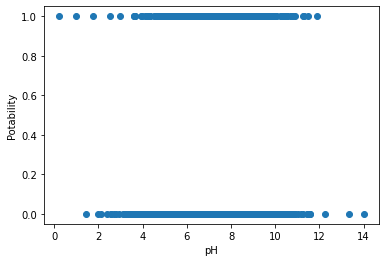

In [256]:
non1 = atributs[1]
x1 = df[non1]
corr = x1.corr(y)
plt.scatter(x1, y); plt.xlabel(non1); plt.ylabel(target.title())

cekCorrelation(non1, target, corr)

#### 2. Scatter Plot Hardness dengan Potability

Korelasi Hardness dengan Potability adalah -0.0014631528959479344
Berdasarkan nilai p, maka Hardness dan Potability berkorelasi negatif dan sangat lemah


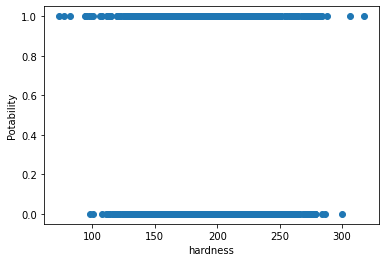

In [257]:
non2 = atributs[2]
x2 = df[non2]
corr = x2.corr(y)
plt.scatter(x2, y); plt.xlabel(non2); plt.ylabel(target.title())

cekCorrelation(non2, target, corr)

#### 3. Scatter Plot Solids dengan Potability

Korelasi Solids dengan Potability adalah 0.03897657818173466
Berdasarkan nilai p, maka Solids dan Potability berkorelasi positif dan sangat lemah


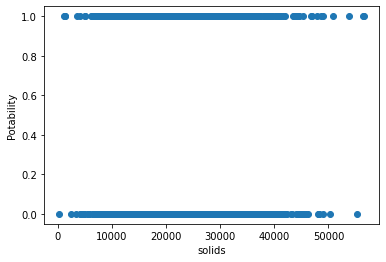

In [258]:
non3 = atributs[3]
x3 = df[non3]
corr = x3.corr(y)
plt.scatter(x3, y); plt.xlabel(non3); plt.ylabel(target.title())

cekCorrelation(non3, target, corr)

#### 4. Scatter Plot Chloramines dengan Potability

Korelasi Chloramines dengan Potability adalah 0.02077892184052409
Berdasarkan nilai p, maka Chloramines dan Potability berkorelasi positif dan sangat lemah


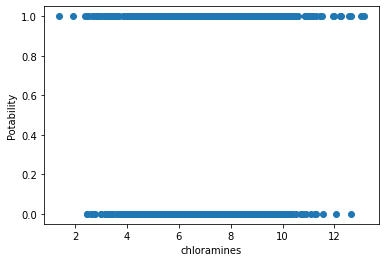

In [259]:
non4 = atributs[4]
x4 = df[non4]
corr = x4.corr(y)
plt.scatter(x4, y); plt.xlabel(non4); plt.ylabel(target.title())

cekCorrelation(non4, target, corr)

#### 5. Scatter Plot Sulfate dengan Potability


Korelasi Sulfate dengan Potability adalah -0.015703164419273778
Berdasarkan nilai p, maka Sulfate dan Potability berkorelasi negatif dan sangat lemah


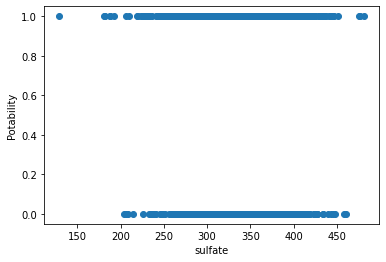

In [260]:
non5 = atributs[5]
x5 = df[non5]
corr = x5.corr(y)
plt.scatter(x5, y); plt.xlabel(non5); plt.ylabel(target.title())

cekCorrelation(non5, target, corr)

#### 6. Scatter Plot Conductivity dengan Potability


Korelasi Conductivity dengan Potability adalah -0.016257120111377067
Berdasarkan nilai p, maka Conductivity dan Potability berkorelasi negatif dan sangat lemah


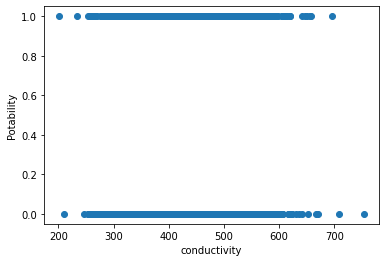

In [261]:
non6 = atributs[6]
x6 = df[non6]
corr = x6.corr(y)
plt.scatter(x6, y); plt.xlabel(non6); plt.ylabel(target.title())

cekCorrelation(non6, target, corr)

#### 7. Scatter Plot OrganicCarbon dengan Potability


Korelasi Organic_Carbon dengan Potability adalah -0.015488461910747259
Berdasarkan nilai p, maka Organic_Carbon dan Potability berkorelasi negatif dan sangat lemah


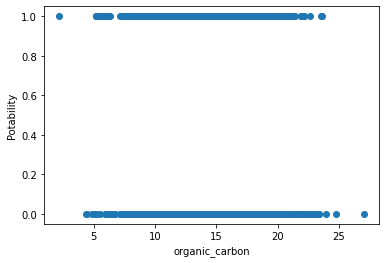

In [262]:
non7 = atributs[7]
x7 = df[non7]
corr = x7.corr(y)
plt.scatter(x7, y); plt.xlabel(non7); plt.ylabel(target.title())

cekCorrelation(non7, target, corr)

#### 8. Scatter Plot Trihalomethanes dengan Potability

Korelasi Trihalomethanes dengan Potability adalah 0.009236711064712997
Berdasarkan nilai p, maka Trihalomethanes dan Potability berkorelasi positif dan sangat lemah


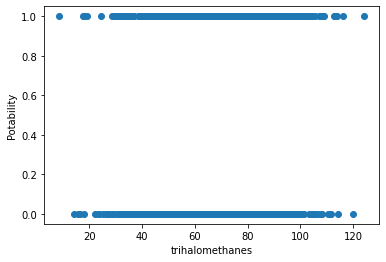

In [263]:
non8 = atributs[8]
x8 = df[non8]
corr = x8.corr(y)
plt.scatter(x8, y); plt.xlabel(non8); plt.ylabel(target.title())

cekCorrelation(non8, target, corr)

#### 9. Scatter Plot Turbidity dengan Potability

Korelasi Turbidity dengan Potability adalah 0.022331042640622665
Berdasarkan nilai p, maka Turbidity dan Potability berkorelasi positif dan sangat lemah


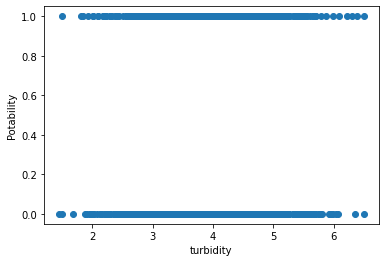

In [264]:
non9 = atributs[9]
x9 = df[non9]
corr = x9.corr(y)
plt.scatter(x9, y); plt.xlabel(non9); plt.ylabel(target.title())

cekCorrelation(non9, target, corr)

### Referensi syntax markdown 
[cheat sheet](https://www.markdownguide.org/cheat-sheet/)  
[mathematics](https://rpruim.github.io/s341/S19/from-class/MathinRmd.html)
